# Objective 2
## Using NLP to Extract Environmental Concerns and Conservation Strategies for Terrestrial Ecosystem Sustainability.
### Imports and Downloads
#### Importing Necessary Libraries
This section imports all the required libraries for data processing, web scraping, NLP, and visualization:
- `pandas` and `numpy`: Data manipulation and numerical operations.
- `matplotlib` and `seaborn`: Data visualization.
- `requests` and `BeautifulSoup`: Web scraping.
- `googlesearch`: Automated Google search queries.
- `nltk`, `TextBlob`, `SentimentIntensityAnalyzer`: NLP and sentiment analysis.
- `sklearn` and `TfidfVectorizer`: Feature extraction for text processing.
- `wordcloud`: Word cloud generation.
- `urllib3`: Disabling SSL warnings for HTTP requests.


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
from googlesearch import search

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag
from nltk import ne_chunk
from nltk.tree import Tree

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import ssl  

import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)



#### Downloading Required NLTK Data
To perform various NLP tasks, we need to download specific datasets from the NLTK library:
- `vader_lexicon`: Lexicon for sentiment analysis.
- `punkt`: Tokenizer models for splitting text into words/sentences.
- `averaged_perceptron_tagger`: Pre-trained part-of-speech (POS) tagger.
- `maxent_ne_chunker`: Named entity chunking model.
- `words`: List of common words for NER.
- `stopwords`: Common stopwords for text preprocessing.


In [2]:
#download required NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sarah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\sarah/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\sarah/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Defining Protected Areas and Data Storage

In [25]:
# List of protected areas
protected_areas = ["Segera Conservancy", "Aberdare National Park", "Masai Mara National Reserve", "Arabuko Sokoke Nature Reserve", 
                   "Kisumu Impala Sanctuary", "Mwaluganje Elephant Sanctuary", "Nairobi Animal Orphanage", "Nairobi Safari Walk", 
                    "Lake Bogoria National Reserve", "Mount Kenya National Park", 
                   "Mount Longonot National Park", "Nairobi National Park", "Ol Donyo Sabuk National Park", "Ruma National Park",
                   "Arawale National Reserve", "Bisanadi National Reserve", "Boni National Reserve", 
                   "Buffalo Springs National Reserve",  "Lake Nakuru National Park"]

# Placeholder list to store extracted conservation-related data
conservation_data = []

In [4]:
# Function to extract named entities
def extract_named_entities(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)# Assigning part-of-speech (POS) tags
    tree = ne_chunk(pos_tags, binary=False)# Performing Named Entity Recognition (NER)
    entities = []# List to store extracted named entities

    # Iterating through the parsed tree structure to extract named entities
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            entity_name = " ".join([token for token, pos in subtree.leaves()])
            entity_label = subtree.label()
            if entity_label in ["ORGANIZATION", "PERSON", "GPE"]:
                entities.append(entity_name)
    return entities


In [5]:
# Function to clean text
def clean_text(text):
    tokens = word_tokenize(text)# Tokenizing text into words
    stop_words = set(stopwords.words("english"))
     # Removing stopwords and non-alphabetic words
    cleaned_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return cleaned_tokens# Returning the cleaned token list

### Web Scraping and Data Processing 


In [6]:
# Loop through each protected area to gather conservation-related data
for area in protected_areas:
    
     # Define search query for conservation efforts related to the area
    search_query = f"{area} conservation efforts"
    links = search(search_query, num_results=1)

    for url in links:
        try:
             # Send a request to the retrieved URL (disabling SSL verification)
            response = requests.get(url, verify = False)
            soup = BeautifulSoup(response.text, "html.parser")
            
            # Extract all text content from paragraph tags
            text = " ".join(p.get_text() for p in soup.find_all('p'))
            
            # Extract named entities 
            entities = extract_named_entities(text)
            
            # Extract keywords
            keywords = clean_text(text)
            
            # Store extracted data in the conservation_data list
            conservation_data.append({
                "Area": area,
                "URL": url,
                "Entities": entities,
                "Keywords": keywords[:10]  # Get top 10 keywords
            })
        except Exception as e:
            print(f"Failed to process {url}: {e}")


Failed to process https://kakamegaforest.com/conservation.html: HTTPSConnectionPool(host='kakamegaforest.com', port=443): Max retries exceeded with url: /conservation.html (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000284C3BCADB0>, 'Connection to kakamegaforest.com timed out. (connect timeout=None)'))


In [7]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(conservation_data)
print(df)

                                Area  \
0                 Segera Conservancy   
1             Aberdare National Park   
2        Masai Mara National Reserve   
3      Arabuko Sokoke Nature Reserve   
4            Kisumu Impala Sanctuary   
5      Mwaluganje Elephant Sanctuary   
6           Nairobi Animal Orphanage   
7                Nairobi Safari Walk   
8      Lake Bogoria National Reserve   
9          Mount Kenya National Park   
10      Mount Longonot National Park   
11             Nairobi National Park   
12      Ol Donyo Sabuk National Park   
13                Ruma National Park   
14          Arawale National Reserve   
15         Bisanadi National Reserve   
16             Boni National Reserve   
17  Buffalo Springs National Reserve   
18         Lake Nakuru National Park   

                                                  URL  \
0                        https://www.segerarhino.com/   
1   https://climate.co.ke/forests-conservation-cha...   
2   https://www.masaimara.co

In [8]:
# Save the DataFrame to a CSV file
df.to_csv("conservation_strategy_data.csv", index=False)

# Reading the saved csv file.
data = pd.read_csv("conservation_strategy_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      19 non-null     object
 1   URL       19 non-null     object
 2   Entities  19 non-null     object
 3   Keywords  19 non-null     object
dtypes: object(4)
memory usage: 740.0+ bytes


In [9]:
# List of protected areas
protected_areas = df['Area'].unique()

protected_areas

array(['Segera Conservancy', 'Aberdare National Park',
       'Masai Mara National Reserve', 'Arabuko Sokoke Nature Reserve',
       'Kisumu Impala Sanctuary', 'Mwaluganje Elephant Sanctuary',
       'Nairobi Animal Orphanage', 'Nairobi Safari Walk',
       'Lake Bogoria National Reserve', 'Mount Kenya National Park',
       'Mount Longonot National Park', 'Nairobi National Park',
       'Ol Donyo Sabuk National Park', 'Ruma National Park',
       'Arawale National Reserve', 'Bisanadi National Reserve',
       'Boni National Reserve', 'Buffalo Springs National Reserve',
       'Lake Nakuru National Park'], dtype=object)

In [10]:
# Define stopwords for filtering
stop_words = set(stopwords.words('english'))

#### Extracting Conservation Strategies for Protected Areas

In [11]:
# Loop through each protected area to gather conservation strategies
for area in protected_areas:
    search_query = f"{area} conservation efforts"
    
    try:
        # Perform a Google search and retrieve top 3 results
        links = search(search_query, num_results=3)  

        strategies = []# List to store extracted conservation strategies
        for url in links:
            try:
                # Send request to the retrieved URL 
                response = requests.get(url, verify=False)
                soup = BeautifulSoup(response.text, "html.parser")
                
                # Extract all paragraph text from the webpage
                text = " ".join([p.get_text() for p in soup.find_all('p')])
                
                # Tokenize and extract entities
                tokens = word_tokenize(text)
                tagged = pos_tag(tokens)
                tree = ne_chunk(tagged)

                # Extract organizations or strategy-related entities
                for subtree in tree:
                    if hasattr(subtree, 'label') and subtree.label() in ['ORGANIZATION', 'FACILITY']:
                        entity = " ".join(c[0] for c in subtree)# Extract entity text
                        
                        # Ensure entity is meaningful and not a common stopword
                        if entity.lower() not in stop_words:
                            strategies.append(entity)

            except Exception as e:
                print(f"Failed to process {url}: {e}")

        # Update DataFrame with extracted strategies
        df.loc[data['Area'] == area, 'Strategies'] = ', '.join(set(strategies)) if strategies else "No strategies found"

    except Exception as e:
        print(f"Failed to search for {area}: {e}")


In [12]:
# Saving Extracted Conservation Strategies to CSV
df.to_csv('conservation_strategy_data_updated.csv', index=False)

### Data Understanding

In [13]:
#Loading the save data
data_2 = pd.read_csv('conservation_strategy_data_updated.csv')

In [14]:
#displaying the first 5 rows
data_2.head()

,Area,URL,Entities,Keywords,Strategies
0,Segera Conservancy,https://www.segerarhino.com/,"['Kenya', 'Kenya', 'Segera Rhino', 'Kenya Rhin...","['Central', 'Kenya', 'perfect', 'rhino', 'coun...","Central Kenya, KRRE, LNP, IUCN, Private, Zeitz..."
1,Aberdare National Park,https://climate.co.ke/forests-conservation-cha...,"['International Forests', 'International', 'Un...","['celebrations', 'International', 'Forests', '...","Conservation Alliance, Translocation, Environm..."
2,Masai Mara National Reserve,https://www.masaimara.com/conservation-masai-m...,"['Sadruddin Aga', 'Masai Mara National Reserve...","['need', 'nature', 'nature', 'needs', 'us', 'l...","Serengeti National, CONSERVATION, Olare Motoro..."
3,Arabuko Sokoke Nature Reserve,https://www.kws.go.ke/sites/default/files/2019...,[],[],"Community Forest, Community Forest Association..."
4,Kisumu Impala Sanctuary,https://www.kws.go.ke/sites/default/files/2019...,[],[],"MPesa, RTGS, EFT, WCMA, AccommodationLuxury Ac..."


In [15]:
# Generate descriptive statistics summary
data_2.describe()

,Area,URL,Entities,Keywords,Strategies
count,19,19,19,19,19
unique,19,19,15,15,19
top,Segera Conservancy,https://www.segerarhino.com/,[],[],"Central Kenya, KRRE, LNP, IUCN, Private, Zeitz..."
freq,1,1,4,4,1


In [16]:
# Checking for null values
data_2.isnull().sum()

Area          0
URL           0
Entities      0
Keywords      0
Strategies    0
dtype: int64

In [17]:
# Checking for missing values
data_2.isna().sum()

Area          0
URL           0
Entities      0
Keywords      0
Strategies    0
dtype: int64

In [18]:
# Checking for duplicates
data_2.duplicated().sum()

0

### Data cleaning. 

In [19]:
#Convert all text in 'Strategies' and 'Area' columns to lowercase for consistency
data_2['Strategies'] = data_2['Strategies'].str.lower().str.strip()
data_2['Area'] = data_2['Area'].str.title().str.strip()  # Capitalize each word in area names

data_2.head()


,Area,URL,Entities,Keywords,Strategies
0,Segera Conservancy,https://www.segerarhino.com/,"['Kenya', 'Kenya', 'Segera Rhino', 'Kenya Rhin...","['Central', 'Kenya', 'perfect', 'rhino', 'coun...","central kenya, krre, lnp, iucn, private, zeitz..."
1,Aberdare National Park,https://climate.co.ke/forests-conservation-cha...,"['International Forests', 'International', 'Un...","['celebrations', 'International', 'Forests', '...","conservation alliance, translocation, environm..."
2,Masai Mara National Reserve,https://www.masaimara.com/conservation-masai-m...,"['Sadruddin Aga', 'Masai Mara National Reserve...","['need', 'nature', 'nature', 'needs', 'us', 'l...","serengeti national, conservation, olare motoro..."
3,Arabuko Sokoke Nature Reserve,https://www.kws.go.ke/sites/default/files/2019...,[],[],"community forest, community forest association..."
4,Kisumu Impala Sanctuary,https://www.kws.go.ke/sites/default/files/2019...,[],[],"mpesa, rtgs, eft, wcma, accommodationluxury ac..."


In [20]:
# Remove special characters from 'Strategies'
data_2['Strategies'] = data_2['Strategies'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

### Sentiment Analysis

In [21]:
# Analyze sentiment polarity
data_2['Sentiments'] = [TextBlob(str(text)).sentiment.polarity if pd.notna(text) else 0 for text in data_2['Strategies']]

# Displaying the first five rows of the updated data
data_2.head()

,Area,URL,Entities,Keywords,Strategies,Sentiments
0,Segera Conservancy,https://www.segerarhino.com/,"['Kenya', 'Kenya', 'Segera Rhino', 'Kenya Rhin...","['Central', 'Kenya', 'perfect', 'rhino', 'coun...",central kenya krre lnp iucn private zeitz foun...,0.097917
1,Aberdare National Park,https://climate.co.ke/forests-conservation-cha...,"['International Forests', 'International', 'Un...","['celebrations', 'International', 'Forests', '...",conservation alliance translocation environmen...,0.000000
2,Masai Mara National Reserve,https://www.masaimara.com/conservation-masai-m...,"['Sadruddin Aga', 'Masai Mara National Reserve...","['need', 'nature', 'nature', 'needs', 'us', 'l...",serengeti national conservation olare motorogi...,0.725000
3,Arabuko Sokoke Nature Reserve,https://www.kws.go.ke/sites/default/files/2019...,[],[],community forest community forest associations...,0.000000
4,Kisumu Impala Sanctuary,https://www.kws.go.ke/sites/default/files/2019...,[],[],mpesa rtgs eft wcma accommodationluxury accomm...,0.000000


In [22]:
# Assigning Sentiment Labels to the Dataset 
sentiment_labels = [] # Initialize an empty list to store sentiment labels

# Iterate through each sentiment score in the dataset
for score in data_2['Sentiments']:
    if score > 0:
        sentiment_labels.append('Positive')
    elif score < 0:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')
        
# Update the Sentiments column with the categorized labels
data_2['Sentiments'] = sentiment_labels

In [23]:
# Displaying the dataset
data_2

,Area,URL,Entities,Keywords,Strategies,Sentiments
0,Segera Conservancy,https://www.segerarhino.com/,"['Kenya', 'Kenya', 'Segera Rhino', 'Kenya Rhin...","['Central', 'Kenya', 'perfect', 'rhino', 'coun...",central kenya krre lnp iucn private zeitz foun...,Positive
1,Aberdare National Park,https://climate.co.ke/forests-conservation-cha...,"['International Forests', 'International', 'Un...","['celebrations', 'International', 'Forests', '...",conservation alliance translocation environmen...,Neutral
2,Masai Mara National Reserve,https://www.masaimara.com/conservation-masai-m...,"['Sadruddin Aga', 'Masai Mara National Reserve...","['need', 'nature', 'nature', 'needs', 'us', 'l...",serengeti national conservation olare motorogi...,Positive
3,Arabuko Sokoke Nature Reserve,https://www.kws.go.ke/sites/default/files/2019...,[],[],community forest community forest associations...,Neutral
4,Kisumu Impala Sanctuary,https://www.kws.go.ke/sites/default/files/2019...,[],[],mpesa rtgs eft wcma accommodationluxury accomm...,Neutral
5,Mwaluganje Elephant Sanctuary,https://www.elesanctuary.org/,['Mod_Security'],"['appropriate', 'representation', 'requested',...",mes kaya mtae shimba hills shimba hills nation...,Neutral
6,Nairobi Animal Orphanage,https://www.kws.go.ke/nairobi-animal-orphanage,"['Set', 'Nairobi National Park', 'Animal Orpha...","['Set', 'amidst', 'lush', 'green', 'vegetation...",wcma langata army barracks matbronze cafe nair...,Neutral
7,Nairobi Safari Walk,https://www.kws.go.ke/nairobi-safari-walk,"['Safari Walk', 'River Mokoyet', 'Nairobi Nati...","['Characterized', 'three', 'simulated', 'major...",guest wcma national parks langata army barrack...,Positive
8,Lake Bogoria National Reserve,https://baringo.go.ke/assets/file/LBNR-Mngt-Pl...,['Mod_Security'],"['appropriate', 'representation', 'requested',...",abs guest nagoya wcma national parks nature co...,Positive
9,Mount Kenya National Park,https://mountkenyawildlifeconservancy.org/,"['MKWC', 'Mount Kenya Wildlife Conservancy', '...","['Anniversary', 'Story', 'News', 'Updates', 'S...",get kenyan highlands wcma environment manageme...,Positive


In [27]:
# Check the count of each sentiment
sentiment_counts = data_2['Sentiments'].value_counts()
sentiment_counts

Sentiments
Positive    10
Neutral      8
Negative     1
Name: count, dtype: int64

### Data Visualization

C:\Users\sarah\AppData\Local\Temp\ipykernel_4712\379632156.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiments', data = data_2, palette='viridis')


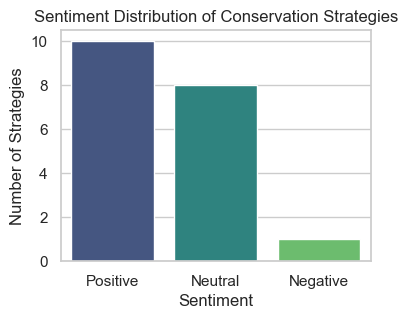

In [29]:
# Set style for seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(4, 3))

# Create a count plot to show the distribution of sentiment labels
sns.countplot(x='Sentiments', data = data_2, palette='viridis')

#Add a title and labels
plt.title('Sentiment Distribution of Conservation Strategies')
plt.xlabel('Sentiment')
plt.ylabel('Number of Strategies')
plt.show()


*Observation:* The positive sentiments are the most with 10, followed by the neutral sentiments at 8 and the negative sentiments are the least which is only one

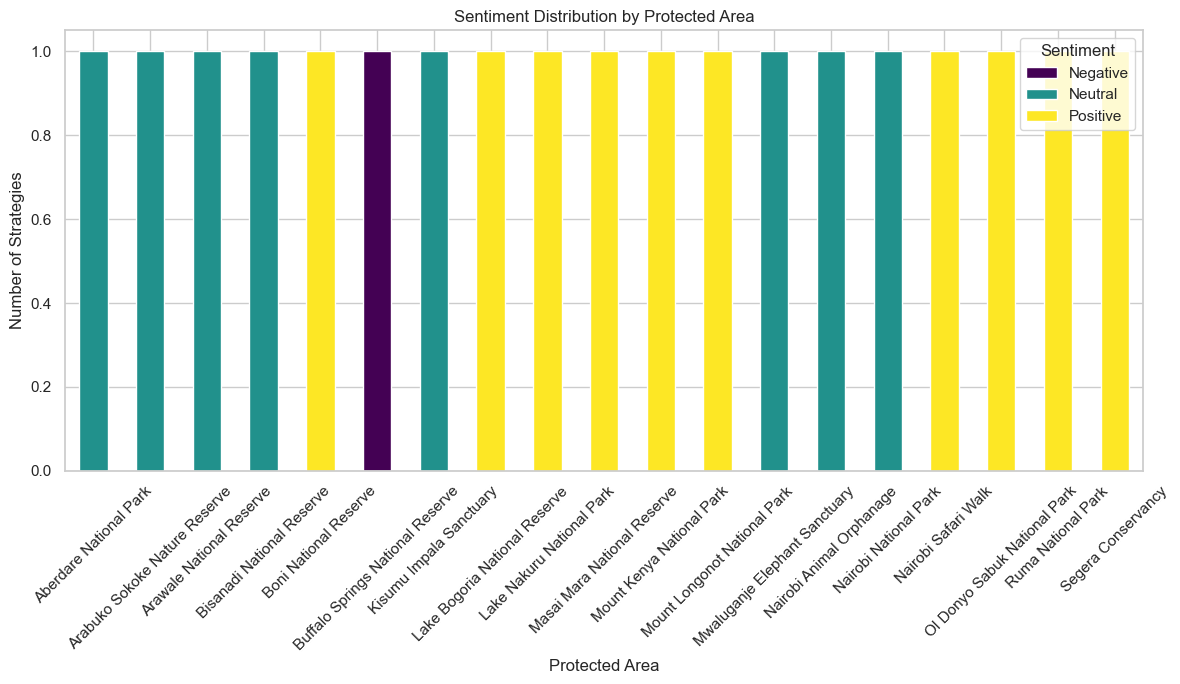

In [30]:
# Group by Area and Sentiment_Label
area_sentiment = data_2.groupby(['Area', 'Sentiments']).size().unstack().fillna(0)

# Plot grouped bar chart
area_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Sentiment Distribution by Protected Area')
plt.xlabel('Protected Area')
plt.ylabel('Number of Strategies')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the bar chart above, we are able to know which protected areas had positive, negative and neutral sentiments just by looking at the different colour codes

###### Extracting Top Keywords from Conservation Strategies using TF-IDF  

In [31]:
# Define custom stop words
custom_stopwords = ['laikipia', 'segera', 'conservancy', 'kenya', 'area', 'protected']

# Initialize TF-IDF Vectorizer with custom stop words
vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=10)  # Extract top 10 keywords
tfidf_matrix = vectorizer.fit_transform(data_2['Strategies'])

# Get feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to a DataFrame
tfidf_data = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Extract top 3 keywords for each entry
data_2['top_keywords'] = tfidf_data.apply(lambda x: ", ".join(x.nlargest(3).index), axis=1)

# View the updated DataFrame
print(data_2[['Area', 'top_keywords']])


                                Area                   top_keywords
0                 Segera Conservancy            national, mara, kws
1             Aberdare National Park         kws, service, national
2        Masai Mara National Reserve        mara, national, reserve
3      Arabuko Sokoke Nature Reserve  wildlife, management, service
4            Kisumu Impala Sanctuary           act, management, kws
5      Mwaluganje Elephant Sanctuary         reserve, national, act
6           Nairobi Animal Orphanage         nairobi, park, service
7                Nairobi Safari Walk         nairobi, national, kws
8      Lake Bogoria National Reserve      management, national, act
9          Mount Kenya National Park      act, wildlife, management
10      Mount Longonot National Park        national, park, nairobi
11             Nairobi National Park        park, wildlife, nairobi
12      Ol Donyo Sabuk National Park            national, kws, park
13                Ruma National Park        nati

In [32]:
# Drop duplicates based on 'Area' and 'top_keywords'
data_unique = data_2.drop_duplicates(subset=['Area', 'top_keywords']).reset_index(drop=True)

# View the cleaned DataFrame
print(data_unique[['Area', 'top_keywords']])

                                Area                   top_keywords
0                 Segera Conservancy            national, mara, kws
1             Aberdare National Park         kws, service, national
2        Masai Mara National Reserve        mara, national, reserve
3      Arabuko Sokoke Nature Reserve  wildlife, management, service
4            Kisumu Impala Sanctuary           act, management, kws
5      Mwaluganje Elephant Sanctuary         reserve, national, act
6           Nairobi Animal Orphanage         nairobi, park, service
7                Nairobi Safari Walk         nairobi, national, kws
8      Lake Bogoria National Reserve      management, national, act
9          Mount Kenya National Park      act, wildlife, management
10      Mount Longonot National Park        national, park, nairobi
11             Nairobi National Park        park, wildlife, nairobi
12      Ol Donyo Sabuk National Park            national, kws, park
13                Ruma National Park        nati

##### Generating a word cloud

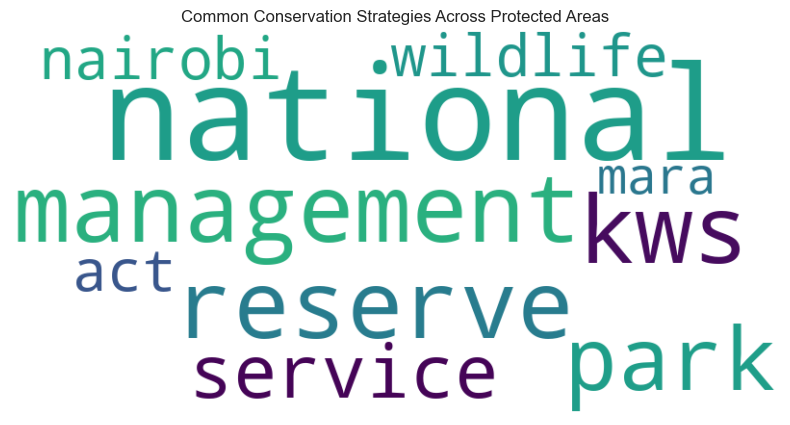

In [33]:
# Combine all keywords for the word cloud
all_keywords = ' '.join(data_unique['top_keywords'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Conservation Strategies Across Protected Areas")
plt.show()

*Observation:*
- The word cloud visually highlights the most frequent conservation strategy keywords.  
- Larger words indicate higher importance or frequency in the dataset.